<a href="https://colab.research.google.com/github/sumanapalle065/LLM-Assign3/blob/Data-Exploration/LLM_Assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First and foremost we start by installing 'transformers' for this project.

In [1]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [2]:
import warnings #imported the warning module to ignore the unnecessary warnings from the code.
warnings.filterwarnings('ignore')

The following are the necessary imports that are essential to develop the LLM Model. This particular dataset focuses on identifying offensive words, hate speech and derogatory language for text classification. Given the amount of data being generated on the social media everyday it is important to train models to filter offensive content to avoid harmful content. This dataset contains the labels '1' and '0' for offensive and non-offensive words respectively.

In [3]:
import pandas as llm_pds

llm_offendata = llm_pds.read_parquet("hf://datasets/valurank/offensive-multi/data/train-00000-of-00001.parquet");

In [4]:
llm_offendata.info() #getting the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36593 entries, 0 to 36592
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36593 non-null  object
 1   text    36593 non-null  object
 2   label   36593 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 857.8+ KB


In [5]:
llm_offendata.head()

,source,text,label
0,hate_speech_offensive,!!! : as a woman you shouldnt complain about ...,0
1,hate_speech_offensive,!!!!! : boy dats cold...tyga dwn bad for cuff...,1
2,hate_speech_offensive,!!!!!!! dawg!!!! : you ever fuck a bitch an...,1
3,hate_speech_offensive,!!!!!!!!! : she look like a tranny,1
4,hate_speech_offensive,!!!!!!!!!!!!! : the shit you hear about me mi...,1


In [6]:
llm_offendata.text.to_list()[0:20]

['!!!  : as a woman you shouldnt complain about cleaning up your house. ; as a man you should always take the trash out...',
 '!!!!!  : boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!!   dawg!!!!  : you ever fuck a bitch and she start to cry? you be confused as shit',
 '!!!!!!!!!  :  she look like a tranny',
 '!!!!!!!!!!!!!  : the shit you hear about me might be true or it might be faker than the bitch who told it to ya &;',
 '!!!!!!!!!!!!!!!!!!": the shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &;&;&;"',
 '!!!!!!": i can not just sit up and hate on another bitch .. i got too much shit going on!"',
 '!!!!&;: cause im tired of you big bitches coming for us skinny girls!!&;',
 '" ; you might not get ya bitch back ; thats that "',
 '"  :hobbies include: fighting mariam"\n\nbitch',
 '" keeks is a bitch she curves everyone " lol i walked into a conversation like this. smh',
 '" murda gang bitch its gang land "',
 

# Data Cleaning

In [7]:
import re #Import the regular expressions module to match and manipulate text patterns.
import nltk #Import the Natural Language Toolkit for various NLP tasks.
from nltk.corpus import stopwords #Import NLTK's stopwords module to filter out frequent stop words in text.
from nltk.stem import WordNetLemmatizer #Use the WordNetLemmatizer from NLTK to reduce words to their base or root form.


#Downloading the necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

#Initializing the lemmatizer and the stop words.
lemm = WordNetLemmatizer()
StopWords = set(stopwords.words('english'))

def CleanText(textdata):
    #Lowercase the text tto maintain uniformity
    textdata = textdata.lower()

    #Removing the punctuation and  the special characters
    textdata = re.sub(r'[^\w\s]', '', textdata)

    #Tokenizing the text into words
    wrdsdt = textdata.split()

    #Removing stop words and lemmatized
    wrdsdt = [lemm.lemmatize(wrd) for wrd in wrdsdt if wrd not in StopWords]

    #Joining the words back into the single string
    CleanedText = ' '.join(wrdsdt)

    return CleanedText

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


The text is cleaned and processed. Regular expressions are used to search for text patterns and some of the common words which do not provide any significant meaning ('it', 'of', 'in', etc)are eliminated.

In [8]:
# Apply the clean_text method to the 'text' column
llm_offendata['text'] = llm_offendata['text'].apply(CleanText)

In [9]:
llm_offendata.text.to_list()[0:20]

['woman shouldnt complain cleaning house man always take trash',
 'boy dat coldtyga dwn bad cuffin dat hoe 1st place',
 'dawg ever fuck bitch start cry confused shit',
 'look like tranny',
 'shit hear might true might faker bitch told ya',
 'shit blow meclaim faithful somebody still fucking hoe',
 'sit hate another bitch got much shit going',
 'cause im tired big bitch coming u skinny girl',
 'might get ya bitch back thats',
 'hobby include fighting mariam bitch',
 'keeks bitch curve everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoe smoke loser yea go ig',
 'bad bitch thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitch get cut everyday b',
 'black bottle bad bitch']

**Handling Missing Values**

In [10]:
llm_offendata.isnull().sum()

,0
source,0
text,0
label,0


The above results indicate that there are no missing values.

# Exploring the Data

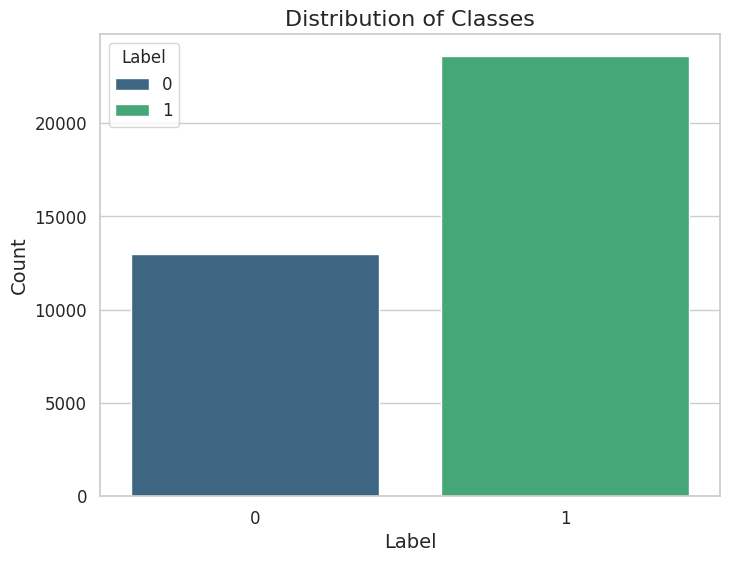

In [14]:
import seaborn as llm_senb
import matplotlib.pyplot as llm_mtplot

llm_senb.set(style="whitegrid")

# Displaying the distribution of two classes '0' (non-offensive) and '1' (offensive)
llm_mtplot.figure(figsize=(8, 6))
llm_senb.countplot(x='label', hue='label', data=llm_offendata, palette='viridis', dodge=False)
llm_mtplot.title('Distribution of Classes', fontsize=16)
llm_mtplot.xlabel('Label', fontsize=14)
llm_mtplot.ylabel('Count', fontsize=14)
llm_mtplot.xticks(fontsize=12)
llm_mtplot.yticks(fontsize=12)
llm_mtplot.legend(title='Label', fontsize=12)
llm_mtplot.show()

Since there are two classes '0' and '1' their distribution is observed. Clearly the offensive words (>20,000) are more than the non-offensive words (<15,000)

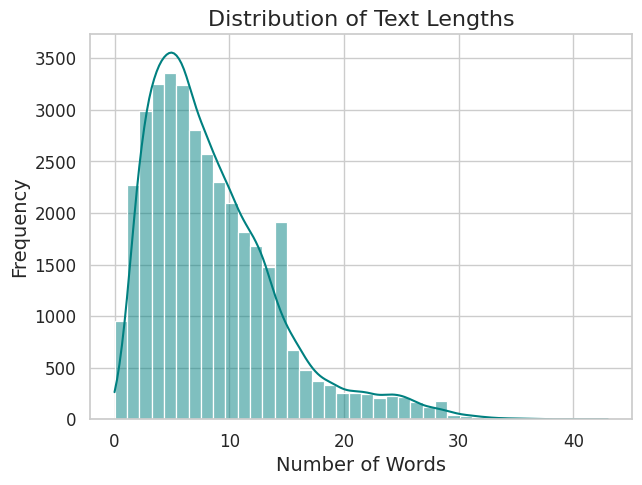

In [17]:
# Calculating the number of the words in each text entry
llm_offendata['text_length'] = llm_offendata['text'].apply(lambda x: len(x.split()))

# Distribution for the length of the texts
llm_mtplot.figure(figsize=(7, 5))
llm_senb.histplot(llm_offendata['text_length'], kde=True, color='teal', bins=40)
llm_mtplot.title('Distribution of Text Lengths', fontsize=16)
llm_mtplot.xlabel('Number of Words', fontsize=14)
llm_mtplot.ylabel('Frequency', fontsize=14)
llm_mtplot.xticks(fontsize=12)
llm_mtplot.yticks(fontsize=12)
llm_mtplot.show()

The length of each text entry is calculated. The distribution above shows that shorter texts are more frequent than the longer ones. The highest frequency is between 0 to 10. The frequecy gradually decreases showing that longer texts are less frequent.